In [182]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import csv

%matplotlib inline

In [327]:
#import missingno as msno

In [3]:
pd.set_option('display.max_columns', 100)

# About the data

"With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home".

In [94]:
# importing training set
%time
df1 = pd.read_csv("/Users/madshelt/Dropbox/NYC Data Science Academy/Projects/Kaggle/train.csv")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [95]:
# importing test set 
%time
df2 = pd.read_csv("/Users/madshelt/Dropbox/NYC Data Science Academy/Projects/Kaggle/test.csv")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [307]:
# Appending training and testing set
%time
df = pd.concat([df1,df2])

In [97]:
df.shape

(2919, 81)

In [98]:
df.sample(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
675,808,536,0,Grvl,3,2fmCon,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,536.0,N,Norm,Norm,FuseF,204,Fa,Fa,AsphShn,AsphShn,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1344,0,GasA,Ex,2Story,2136,2,TA,Lvl,Gtl,10320,Inside,60.0,Reg,0,190,RM,0.0,None,NaN,0,5,IDOTRR,0,3,3,N,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,8,536.0,AllPub,42,1915,1950,2008
130,960,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,960.0,Y,Norm,Norm,SBrkr,0,TA,TA,WdShing,Wd Shng,MnPrv,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,960,0,GasA,Ex,1Story,1591,1,TA,HLS,Gtl,6410,Inside,64.0,Reg,0,20,RL,0.0,None,NaN,0,5,Edwards,0,5,4,Y,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,5,960.0,AllPub,0,1958,1958,2010
452,888,868,0,NaN,3,1Fam,TA,No,742.0,0.0,ALQ,Unf,1.0,0.0,Ex,130.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,422.0,2.0,TA,Fin,TA,Attchd,1996.0,1756,1,GasA,Ex,2Story,453,1,TA,Lvl,Gtl,9303,Corner,NaN,IR1,0,60,RL,42.0,BrkFace,NaN,0,7,Timber,122,5,6,Y,0,NaN,CompShg,Hip,Normal,204000.0,WD,0,Pave,7,872.0,AllPub,144,1996,1997,2007
518,882,914,0,NaN,3,1Fam,TA,Mn,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,88.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,PConc,2,Typ,546.0,2.0,TA,RFn,TA,Attchd,1998.0,1796,1,GasA,Ex,2Story,519,1,TA,Lvl,Gtl,9531,CulDSac,NaN,IR1,0,60,RL,0.0,None,NaN,0,5,CollgCr,36,5,6,Y,0,NaN,CompShg,Gable,Normal,211000.0,WD,0,Pave,7,794.0,AllPub,0,1998,1998,2007
717,886,878,0,NaN,3,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Gd,850.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,560.0,2.0,TA,Unf,TA,Attchd,1999.0,1764,1,GasA,Ex,2Story,2178,1,Gd,Lvl,Gtl,11690,Inside,96.0,IR1,0,60,RL,192.0,BrkFace,NaN,0,6,CollgCr,29,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,7,850.0,AllPub,120,1999,2000,2008
477,2069,574,0,NaN,3,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Gd,2153.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,694.0,3.0,TA,Fin,TA,BuiltIn,2006.0,2643,1,GasA,Ex,2Story,478,1,Ex,Lvl,Gtl,13693,Inside,105.0,Reg,0,60,RL,772.0,BrkFace,NaN,0,3,NridgHt,84,5,9,Y,0,NaN,CompShg,Hip,Normal,380000.0,WD,0,Pave,9,2153.0,AllPub,414,2006,2006,2007
904,902,0,0,NaN,3,1Fam,TA,No,599.0,0.0,GLQ,Unf,0.0,0.0,TA,277.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Sdng,MnPrv,NaN,0,CBlock,1,Typ,288.0,1.0,TA,Unf,TA,Attchd,1967.0,902,0,GasA,TA,1Story,905,1,TA,Lvl,Gtl,6173,Inside,NaN,IR1,0,20,RL,75.0,BrkFace,NaN,0,8,Sawyer,0,6,5,Y,0,NaN,CompShg,Gable,Normal,125500.0,WD,0,Pave,6,876.0,AllPub,0,1967,1967,2007
895,1094,0,0,NaN,3,1Fam,TA,No,729.0,0.0,GLQ,Unf,1.0,0.0,Gd,365.0,Y,RRAe,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,2004.0,1094,0,GasA,Ex,1Story,2356,1,Gd,Lvl,Gtl,12450,Inside,60.0,Reg,0,20,RL,126.0,BrkFace,NaN,0,5,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,1094.0,AllPub,0,2003,2004,2007
1109,1836,0,0,NaN,3,1Fam,TA,Mn,1039.0,0.0,GLQ,Unf,1.0,0.0,Ex,797.0,Y,Norm,Norm,SBrkr,0,TA,Gd,MetalSd,MetalSd,NaN,Gd,1,PConc,2,Typ,862.0,3.0,TA,Fin,TA,Attchd,2004.0,1836,0,GasA,Ex,1Story,1110,1,Gd,Lvl,Gtl,11362,Inside,107.0,IR1,0,20,RL,42.0,Stone,NaN,0,3,NridgHt,185,5,8,Y,0,NaN,CompShg,Gable,Normal,280000.0,WD,0,Pave,7,1836.0,AllPub,125,2004,2005,2009
1200,1792,0,0,NaN,2,1Fam,TA,Gd,1232.0,0.0,GLQ

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
2ndFlrSF,2919.0,336.483727,428.701456,0.0,0.0,0.0,704.0,2065.0
3SsnPorch,2919.0,2.602261,25.188169,0.0,0.0,0.0,0.0,508.0
BedroomAbvGr,2919.0,2.860226,0.822693,0.0,2.0,3.0,3.0,8.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
EnclosedPorch,2919.0,23.098321,64.244246,0.0,0.0,0.0,0.0,1012.0


### Inspecting target variable

Skewness: 1.882876
Kurtosis: 6.536282


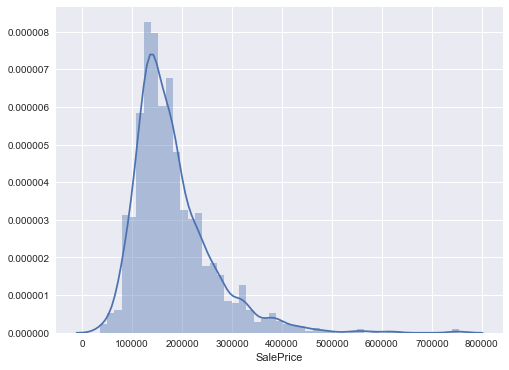

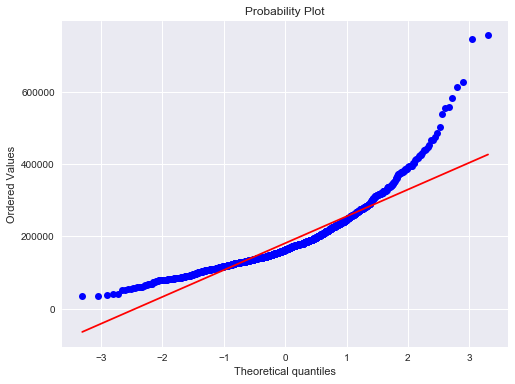

In [184]:
# histogram of target label
plt.subplots(figsize=(8, 6))
sns.distplot(response['SalePrice'])
print("Skewness: %f" % response['SalePrice'].skew())
print("Kurtosis: %f" % response['SalePrice'].kurt()) 
plt.subplots(figsize=(8, 6))
prob_plot = stats.probplot(response['SalePrice'], plot=plt)

The histogram of the target variable shows that it is positive skewed and thus has a long right tail. Also, from the probability plot we can observe that the observations don't follow the theoretical line and there is a high deviation for higher values of the SalePrice, which we also waw on the histogram.

#### Relationship between target and features 

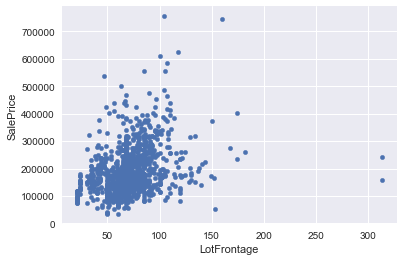

In [185]:
# Scatterplot of SalePrice vs. LotFrontage
response.plot.scatter(x='LotFrontage', y='SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel("SalePrice")

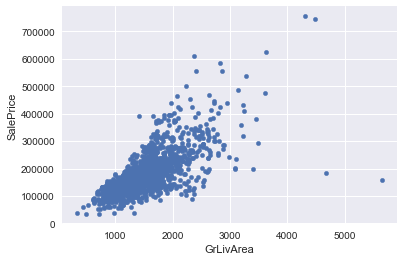

In [186]:
# Scatterplot of SalePrice vs. GrLivArea
response.plot.scatter(x='GrLivArea', y='SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel("SalePrice")

In [308]:
#sns.set()
#sns.pairplot(response, size = 2.5)
#plt.show()

In [73]:
# Missing data of object datatype
missing_objects = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)
missing_objects_percentage = df.select_dtypes(include=['object']).isnull().sum() / df.select_dtypes(include=['object']).count().sort_values(ascending = False) * 100
missing_data_objects = pd.concat([missing_objects, missing_objects_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_objects1 = missing_data_objects.loc[(missing_data_objects['Percent'] > 0)].sort_values(by = 'Percent', ascending = False)
len(missing_data_objects1)

18

In [74]:
# Missing data of category object
missing_category = df.select_dtypes(include=['category']).isnull().sum().sort_values(ascending = False)
missing_category_percentage = df.select_dtypes(include=['category']).isnull().sum() / df.select_dtypes(include=['category']).count().sort_values(ascending = False) * 100
missing_data_category = pd.concat([missing_category, missing_category_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_category1 = missing_data_category.loc[(missing_data_category['Percent'] > 0)].sort_values(by = 'Percent', ascending = False)
len(missing_data_category1)

0

In [88]:
# Missing data of int64 category
missing_int = df.select_dtypes(include=['int64']).isnull().sum().sort_values(ascending = False)
missing_int_percentage = df.select_dtypes(include=['int64']).isnull().sum() / df.select_dtypes(include=['int64']).count().sort_values(ascending = False) * 100
missing_data_int = pd.concat([missing_int, missing_int_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_int1 = missing_data_int.loc[(missing_data_int['Percent'] > 0)].sort_values(by = 'Percent', ascending = False)
len(missing_data_int1)

0

In [89]:
# Missing data of float64 category
missing_float = df.select_dtypes(include=['float64']).isnull().sum().sort_values(ascending = False)
missing_float_percentage = df.select_dtypes(include=['float64']).isnull().sum() / df.select_dtypes(include=['float64']).count().sort_values(ascending = False) * 100
missing_data_float = pd.concat([missing_float, missing_float_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_float1 = missing_data_float.loc[(missing_data_float['Percent'] > 0)].sort_values(by = 'Percent', ascending = False)
len(missing_data_float1)

12

In [99]:
# Creating a table to show missing values for variable types
missing_data_initial = (df.isnull().sum(axis=0) / float(len(df))).sort_values(ascending = False)
missing_initial = pd.DataFrame(missing_data_initial.drop(missing_data_initial[missing_data_initial == 0].index))

In [106]:
missing_initial

,0
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
SalePrice,0.499829
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageCond,0.054471
GarageQual,0.054471


### Handling missing values for categorical data 

Most interesting is it to observe the variables with the highest proportion of missing values. Most of them are nominal variables and by inspection they do not contain missing values, since this is a special value type. In order to fix this and at the same time reduce the number of variables when later converting to dummy variables, I insert the value 1 if NaN and 2 for all the other values. The result will then be a variable with binary values. I acknowledge that some of these variables are actually ordinal variables, and thus some information can be lost when doing this converting. However, the argument is that these variables have so many missing values that the information in them don't contribute anyway. For the variable "FireplaceQu", I just insert "None" for the missing values, since this variable still contribute with some relationship to the target variable.

Trade-off to consider (for variables with missingness of minimum 80%):
- Keep rank in the variables, but increased number of variables when converting to dummy
- Don't keep rank and convert to binary values, but decreased number of variables when converting to dummy

In [310]:
list_ = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond']

In [311]:
df[list_] = df[list_].fillna('None')

In [312]:
# Changing nominal variables into variables with binary values
def multinominal_to_binary(a):
    if a != 'None':
        return 1
    if a == 'None':
        return 0

df['PoolQC'] = df['PoolQC'].apply(multinominal_to_binary)
df['MiscFeature'] = df['MiscFeature'].apply(multinominal_to_binary)
df['Alley'] = df['Alley'].apply(multinominal_to_binary)
df['Fence'] = df['Fence'].apply(multinominal_to_binary)
df['GarageType'] = df['GarageType'].apply(multinominal_to_binary)

In [324]:
# inspecting the missing table again
missing_data_updated = (df.isnull().sum(axis=0) / float(len(df))).sort_values(ascending = False)
missing_updated = pd.DataFrame(missing_data_updated.drop(missing_data_updated[missing_data_updated == 0].index))

In [325]:
missing_updated

,0
SalePrice,0.499829
BsmtCond,0.028092
BsmtExposure,0.028092
BsmtQual,0.027749
BsmtFinType2,0.027407
BsmtFinType1,0.027064
MasVnrType,0.008222
MasVnrArea,0.007879
MSZoning,0.001370
Utilities,0.000685


#### Inspecting FireplaceQu 

In [315]:
df['FireplaceQu'].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

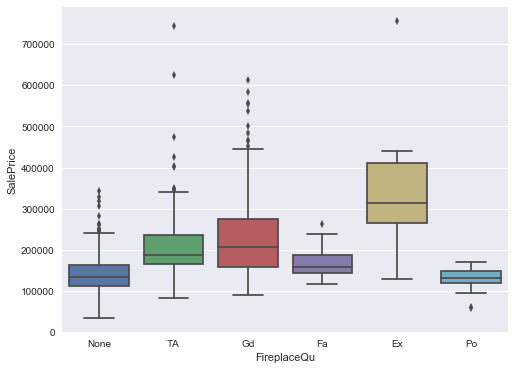

In [316]:
# box plot for FireplaceQu vs. SalePrice
data = pd.concat([df['FireplaceQu'], df['SalePrice']], axis = 1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = data)

Seems like there is some kind of pattern here as the price range is different for the different qualities of fireplaces. Since we still have around 52% of values in this variable, I want to keep the rank/order.

In [317]:
def nominal_to_ordinal(a):
    if a == 'Ex':
        return 5
    if a == 'Gd':
        return 4
    if a == 'TA':
        return 3
    if a == 'Fa':
        return 2
    if a == 'Po':
        return 1
    if a == 'None':
        return 0
df['FireplaceQu'] = df['FireplaceQu'].apply(nominal_to_ordinal)
df['GarageCond'] = df['GarageCond'].apply(nominal_to_ordinal)
df['GarageQual'] = df['GarageQual'].apply(nominal_to_ordinal)

In [318]:
def garage_to_ordinal(a):
    if a == 'Fin':
        return 3
    if a == 'RFn':
        return 2
    if a == 'Unf':
        return 1
    if a == 'None':
        return 0
df['GarageFinish'] = df['GarageFinish'].apply(garage_to_ordinal)

In [319]:
df['GarageFinish'] = df['GarageFinish'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

#### Inspecting LotFrontage 

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
------------------------------------------------------------
Length of LotFrontage after removing missing:  2433
------------------------------------------------------------


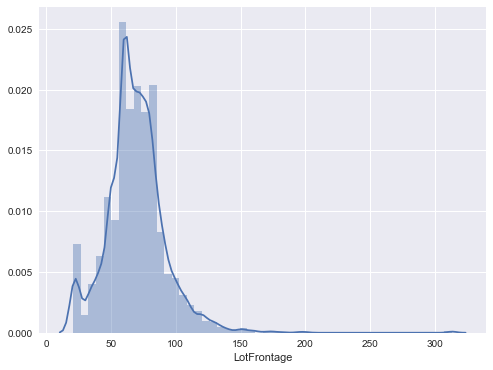

In [322]:
plt.subplots(figsize=(8, 6))
LotFrontage_ = df[df['LotFrontage'].notnull()]['LotFrontage']
print(LotFrontage_.describe())
print("--" * 30)
print("Length of LotFrontage after removing missing: ", len(LotFrontage_))
print("--" * 30)
sns.distplot(LotFrontage_)

The histogram shows that the LotFrontage has a positive skewed distributions. Remember that the goal of this distribution inspection is to find out which method to use for imputing missing values. Thus, based on the distribution, a possibility is to replace the missing values with the median of the nonmissing values, because this statistic is less sensitive to extreme values compared to using the mean. Of this reason, I go for the median. 

- Remove outliers before imputing missing values??

count    2919.000000
mean       69.088386
std        21.317898
min        21.000000
25%        60.000000
50%        68.000000
75%        78.000000
max       313.000000
Name: LotFrontage, dtype: float64

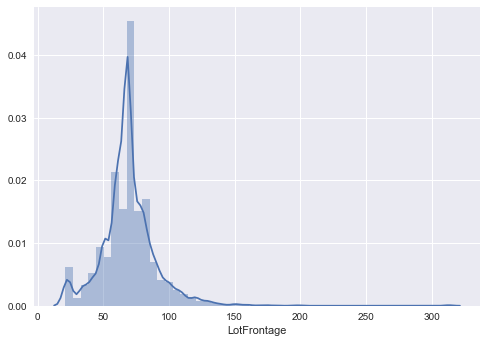

In [323]:
# df.LotFrontage.median
df.LotFrontage = df.LotFrontage.fillna(value = df.LotFrontage.median())
sns.distplot(df.LotFrontage)
df.LotFrontage.describe()

### Thoughts on missingness
- Inspect missing values pattern for Garage variables
- Inspect missing values for variables with the same percentage missing: 0.000343
- Convert those numeric variables that are actually categorical 
- Check other variables for missing values (OR weird values)

In [ ]:
# Next step
# Correlation matrix (multicollinearity??)
# Feature engineering - interaction, new variables 